### Machine Learning 

> Dataset: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
# Importações das bibliotecas
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import metrics

> 1. Junte os dois conjunto de dados de Vinho tinto de vinho branco separa esses dados em treinamento e teste, utilizando o k-means crie uma categoria para cada tipo de vinho utilizando os dados de treinamento para definir as categorias, classifique os vinhos de teste e compara o rotulo original deles com o rotulo do kmeans (30 pontos)

#### Organização dos dados

In [68]:
db_red=pd.read_csv('winequality-red.csv', sep =';')
db_white=pd.read_csv('winequality-white.csv', sep =';')

In [69]:
# Adiciona um label para cada tipo de vinho
def label(df, value):
    label_aux = []
    for label in range(len(df)): label_aux.append(value)
    df['label'] = label_aux
     
label(db_red, 0) #'red = 0'
label(db_white, 1) #'white = 1'

In [70]:
# Junta os dois conjuntos de dados 
df = pd.merge(db_red, db_white, how = 'outer')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


#### Solução 01: Função Sklearn K-means 

In [71]:
# Extrai as features e os labels
features, label = [], []
def features_extraction(d):
    for i in range(len(d)):
        features.append(d[i][:12])
        label.append(d[i][12])
    return features, label

d = df.to_numpy().tolist()
features, label = features_extraction(d)

In [72]:
# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.3)

In [73]:
kmeans = KMeans(init="random", n_clusters=2, max_iter=500, random_state=None)
kmeans.fit(X_train)

acc_Kmeans = metrics.accuracy_score(y_test, kmeans.predict(X_test))
print("ACC K-Means: {}".format(acc_Kmeans))

ACC K-Means: 0.7846153846153846


In [74]:
columns=column_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                      'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
                      'quality']
data_df = pd.DataFrame(X_test, columns=column_names)
data_df['label'] = y_test
data_df['label K-means'] = kmeans.predict(X_test)
data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label,label K-means
0,7.5,0.28,0.33,7.7,0.048,42.0,180.0,0.99740,3.37,0.59,10.1,6.0,1.0,1
1,6.9,0.28,0.30,8.3,0.026,37.0,113.0,0.99139,2.99,0.38,12.3,8.0,1.0,1
2,6.6,0.58,0.00,2.2,0.100,50.0,63.0,0.99544,3.59,0.68,11.4,6.0,0.0,0
3,6.0,0.26,0.29,3.1,0.041,37.0,144.0,0.98944,3.22,0.39,12.8,7.0,1.0,1
4,6.9,0.14,0.38,1.0,0.041,22.0,81.0,0.99043,3.03,0.54,11.4,6.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,8.5,0.22,0.34,0.7,0.040,5.0,25.0,0.99180,3.04,0.37,10.5,4.0,1.0,0
1946,6.0,0.25,0.28,7.7,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,6.0,1.0,1
1947,6.3,0.17,0.42,2.8,0.028,45.0,107.0,0.99080,3.27,0.43,11.8,6.0,1.0,1
1948,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6.0,0.0,0


#### Solução 02: K-means apresentado em sala

In [75]:
# Divisão de treinos e teste
treinamento=df.sample(frac=.8,random_state=200)
teste=df.drop(treinamento.index)
treinamento=treinamento.reset_index(drop=True)
teste=teste.reset_index(drop=True)

In [76]:
for i,r in teste.iterrows():
    distancias=[]
    for j,t in treinamento.iterrows():
        dist=np.linalg.norm(r[:12]-t[:12])
        distancias.append([dist,t[12]])
    distancias.sort(key=lambda x:x[0])
    distancias=distancias[:11]
    classes=[d[1] for d in distancias]
    classe= max(set(classes),key=classes.count)
    teste.at[i,'classe_kmens']=classe

In [77]:
label_teste, label_classe_kmens=[],[]
for i,r in teste.iterrows():
    label_teste.append(r['label'])
    label_classe_kmens.append(r['classe_kmens'])
teste

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label,classe_kmens
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,0,0.0
1,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.300000,5,0,0.0
2,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4,0,0.0
3,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.700000,7,0,0.0
4,6.4,0.40,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.200000,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,6.2,0.36,0.32,4.0,0.036,44.0,92.0,0.98936,3.20,0.50,13.300000,7,1,1.0
1295,5.8,0.23,0.31,4.5,0.046,42.0,124.0,0.99324,3.31,0.64,10.800000,6,1,1.0
1296,5.6,0.20,0.36,2.5,0.048,16.0,125.0,0.99282,3.49,0.49,10.000000,6,1,1.0
1297,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,1,1.0


> 2 - Com essa mesma separação de dados construa uma rede neural que seja treinada com os dados de treinamento e depois classifique os dados de teste como qual o tipo de vinho (50 pontos)

In [78]:
def generate_MLP_model(X_train, y_train, X_test):
    classifier = MLPClassifier(hidden_layer_sizes=(100), max_iter=300,
                               activation = 'relu', solver='adam', random_state=1)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    return predicted

result = generate_MLP_model(X_train, y_train, X_test)

In [79]:
acc_MLP = metrics.accuracy_score(y_test, result)
precision_MLP = metrics.precision_score(y_test, result, average=None)
recall_MLP = metrics.recall_score(y_test, result, average=None)
f1_score_MLP = metrics.f1_score(y_test, result, average=None)

print("Acc MLP: {:.3f}".format(acc_MLP))
print("Precision MLP: {}".format(precision_MLP))
print("Recall MLP: {}".format(recall_MLP))
print("F1 Score MLP: {}".format(f1_score_MLP))

Acc MLP: 0.986
Precision MLP: [0.96728016 0.99247091]
Recall MLP: [0.97727273 0.98908595]
F1 Score MLP: [0.97225077 0.99077554]


[Text(0.5, 1.0, 'MLP - Tipo de Vinho'),
 Text(33.0, 0.5, 'True Label'),
 Text(0.5, 15.0, 'Predicted Label')]

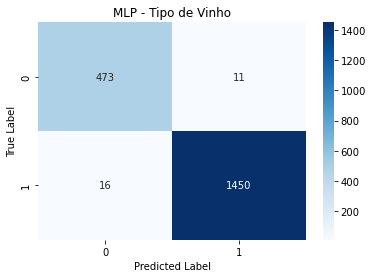

In [80]:
cm = metrics.confusion_matrix(y_test, result)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues').set(title="MLP - Tipo de Vinho", ylabel='True Label', xlabel='Predicted Label')

> 3 - Construa uma outra rede neural que utilize os as características do vinho para predizer a sua qualidade

#### Organização dos dados

In [81]:
# Extrai as features e os labels - o label agora será o value da qualidade do vinho
features, label = [], []
def features_extraction(d):
    features_list = []
    for i in range(len(d)):
        features.append(d[i][:11])
        label.append(d[i][11])
    return features, label

d = df.to_numpy().tolist()
features_quality, label_quality = features_extraction(d)

In [82]:
# Divisão dos dados
X_train_Q, X_test_Q, y_train_Q, y_test_Q = train_test_split(features_quality,label_quality,test_size=0.3)

def generate_MLP_model2(X_train, y_train, X_test):
    classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300,
                               activation = 'relu', solver='adam', random_state=1)
                               #verbose=True)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    return predicted

result_Q = generate_MLP_model2(X_train_Q, y_train_Q, X_test_Q)

In [83]:
acc_MLP = metrics.accuracy_score(y_test_Q, result_Q)
print("Acc MLP: {:.3f}".format(acc_MLP))

Acc MLP: 0.529


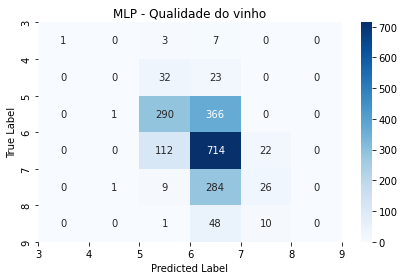

In [84]:
cm = metrics.confusion_matrix(y_test_Q, result_Q)

targetNames = [3, 4, 5, 6, 7, 8, 9]
tick_marks = [0, 1, 2, 3, 4, 5, 6]

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues').set(title="MLP - Qualidade do vinho", ylabel='True Label', xlabel='Predicted Label')

plt.xticks(tick_marks, np.array(targetNames))
plt.yticks(tick_marks, np.array(targetNames))
plt.tight_layout()